### Import the Libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Exploration

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Feature Engineering

In [12]:
data['petal_length_to_width'] = data['petal length (cm)'] / data['petal width (cm)']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_length_to_width
0,5.1,3.5,1.4,0.2,0,7.0
1,4.9,3.0,1.4,0.2,0,7.0
2,4.7,3.2,1.3,0.2,0,6.5
3,4.6,3.1,1.5,0.2,0,7.5
4,5.0,3.6,1.4,0.2,0,7.0


### Data Visualization

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


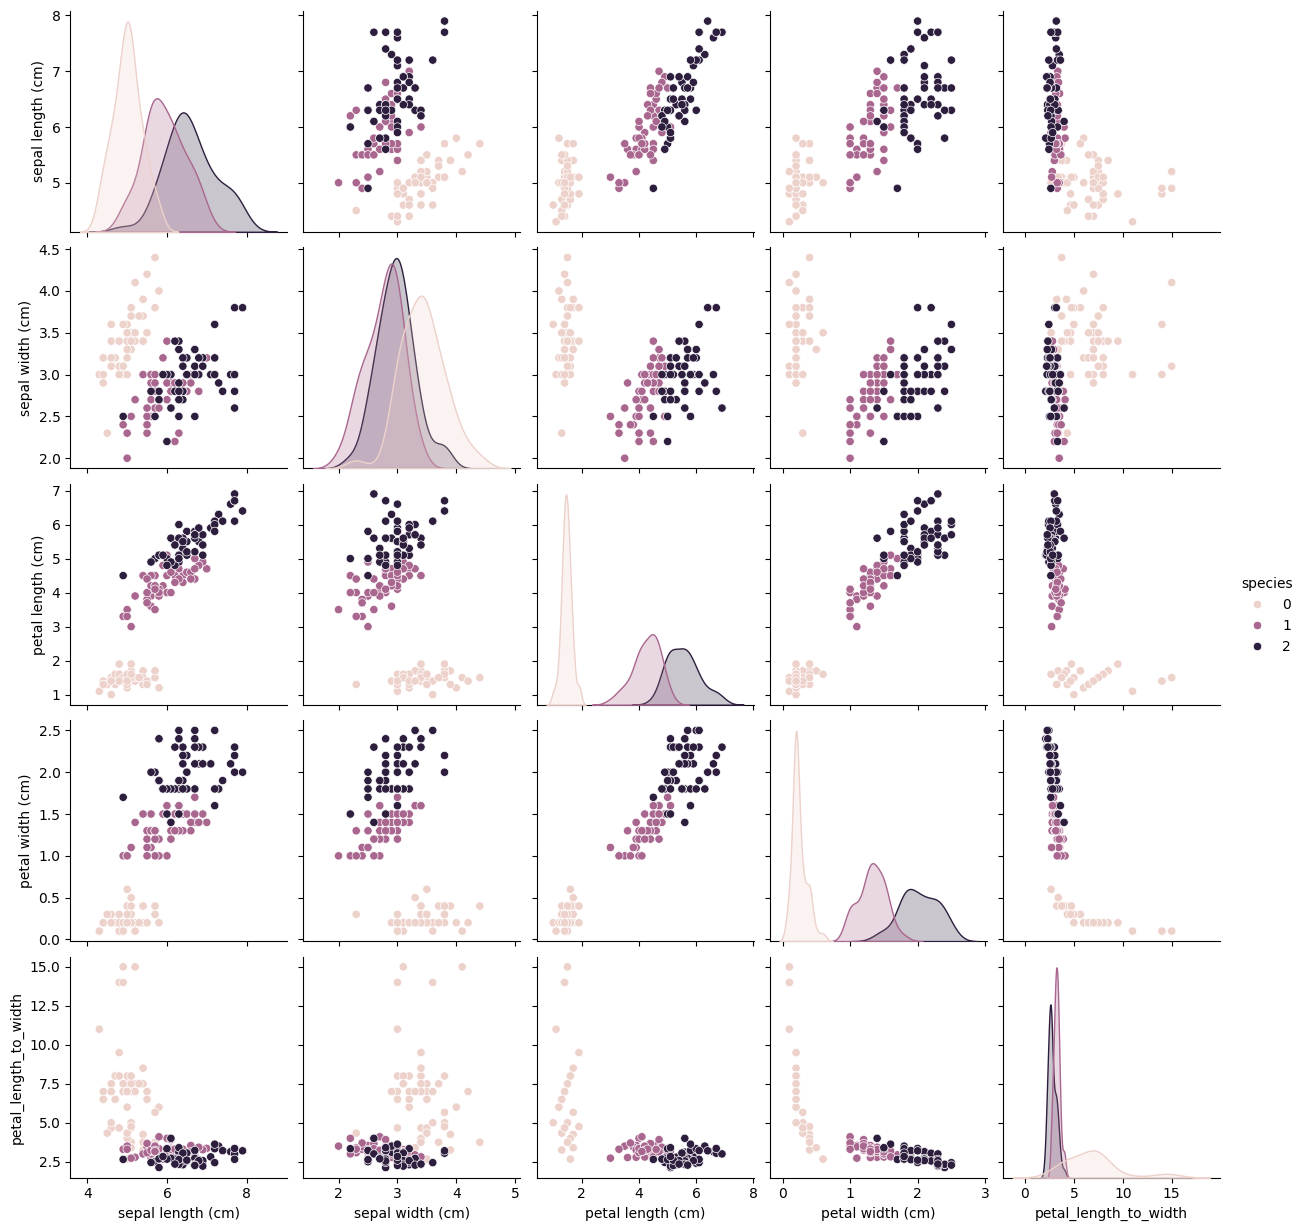

In [14]:
sns.pairplot(data, hue='species')
plt.savefig('pairplot_features.png')
plt.show()

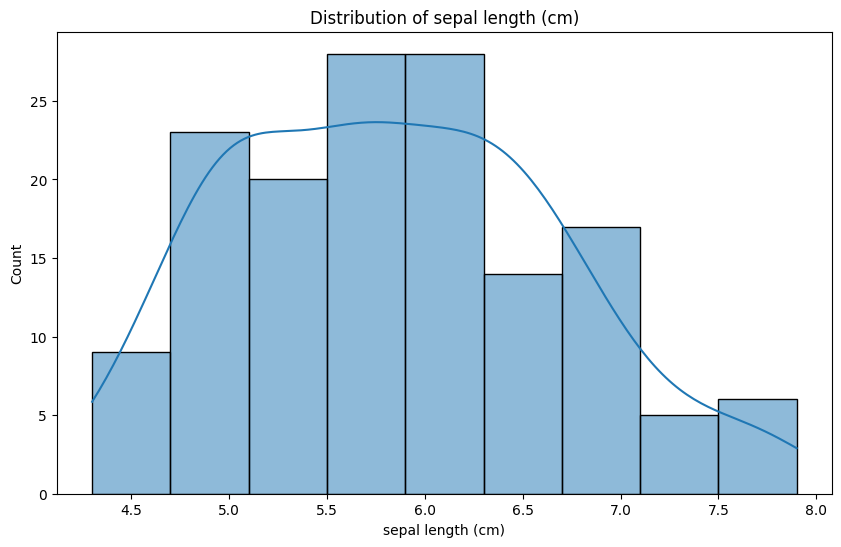

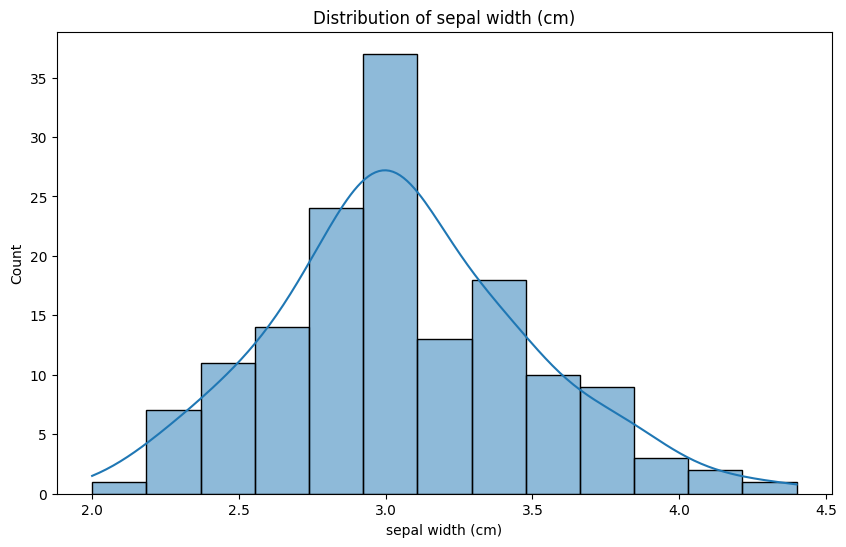

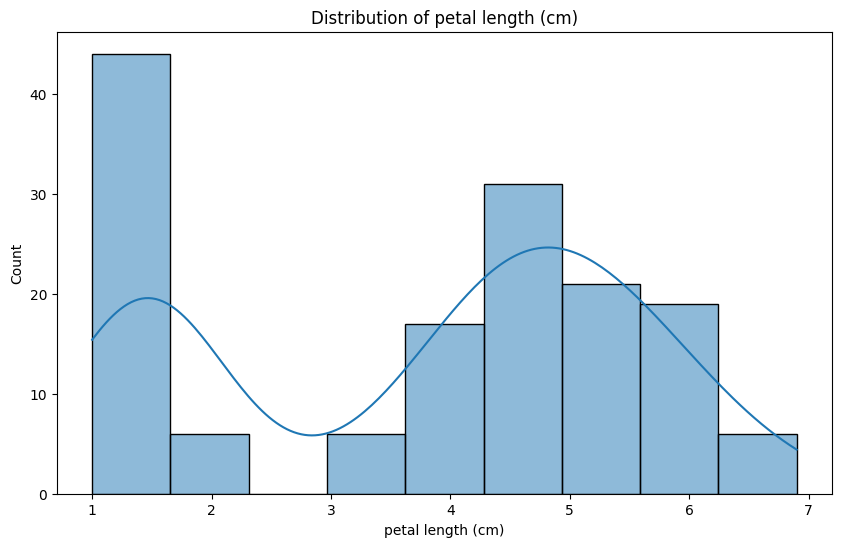

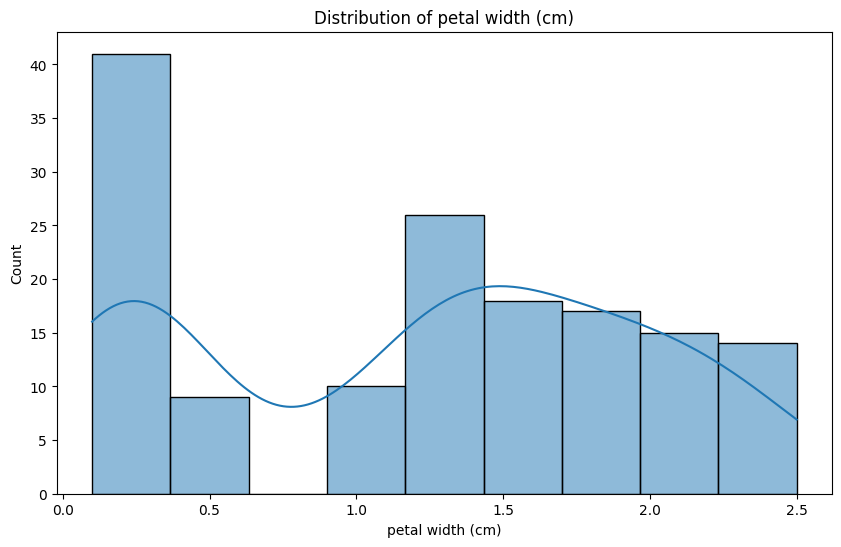

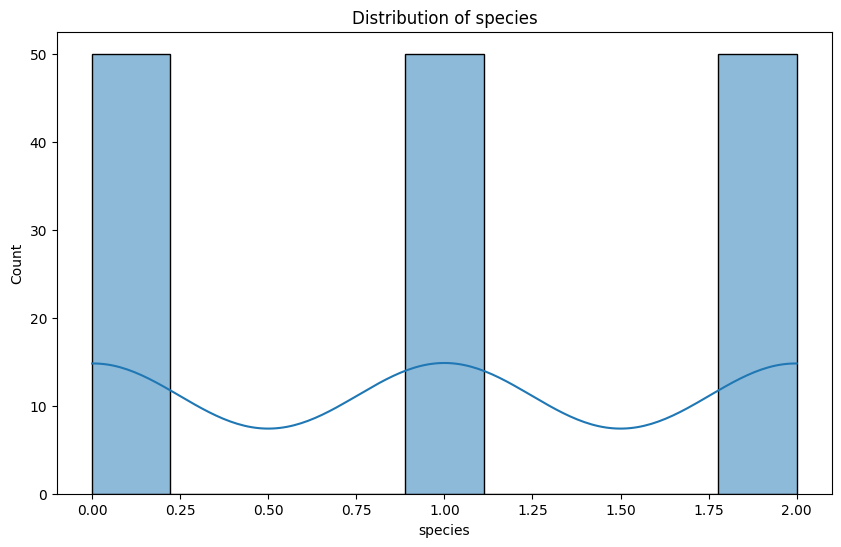

In [15]:
for column in data.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.savefig(f'distribution_{column}.png')
    plt.show()

### Data Preprocessing and Model Training

In [16]:
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- creating a pipeline

In [17]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [18]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [19]:
y_pred = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy Score: 0.9666666666666667


### Hyperparameter Tuning

- hyperparameter tuning using GridSearchCV to find the best model parameters.

In [20]:
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best Cross-Validation Score: 0.9416666666666667


In [21]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix for Best Model:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy Score for Best Model:", accuracy_score(y_test, y_pred_best))

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix for Best Model:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy Score for Best Model: 0.9666666666666667


### Cross-Validation

In [24]:
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean Cross-Validation Score: 0.9733333333333334


### Comparison with Other Models:

In [25]:
# Train and evaluate using KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy Score: 1.0


In [39]:
knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=5)
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("Mean KNN Cross-Validation Score:", knn_cv_scores.mean())

KNN Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean KNN Cross-Validation Score: 0.96


In [26]:
# Train and evaluate using Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200))
])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy Score: 1.0


In [40]:
logreg_cv_scores = cross_val_score(logreg_pipeline, X, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Mean Logistic Regression Cross-Validation Score:", logreg_cv_scores.mean())

Logistic Regression Cross-Validation Scores: [0.96666667 1.         0.93333333 0.9        0.96666667]
Mean Logistic Regression Cross-Validation Score: 0.9533333333333334


### Confusion Matrix for all models:

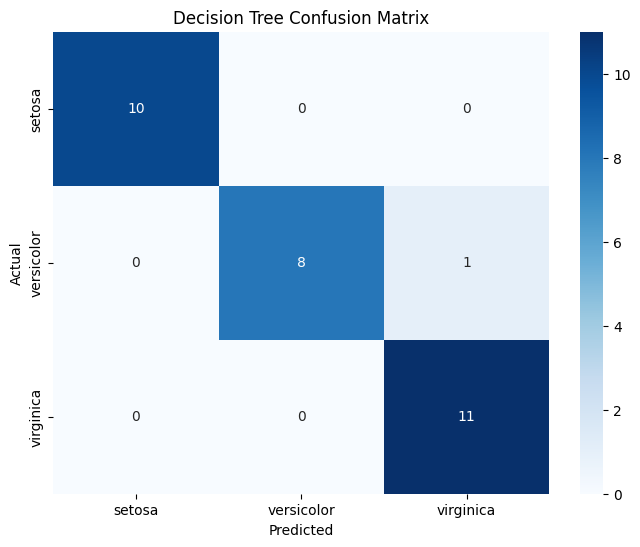

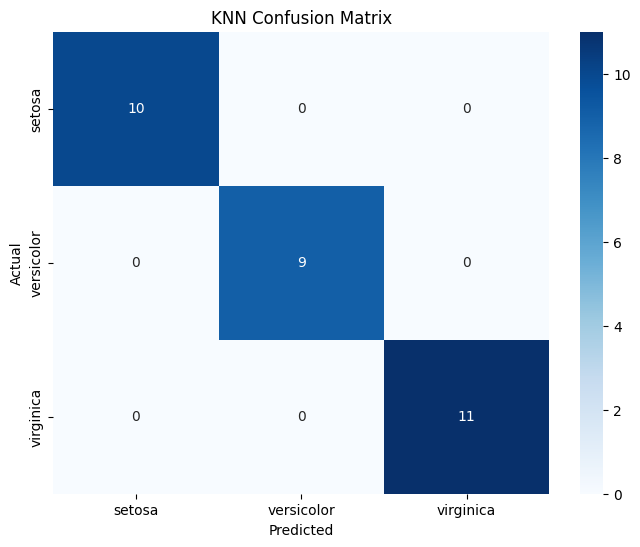

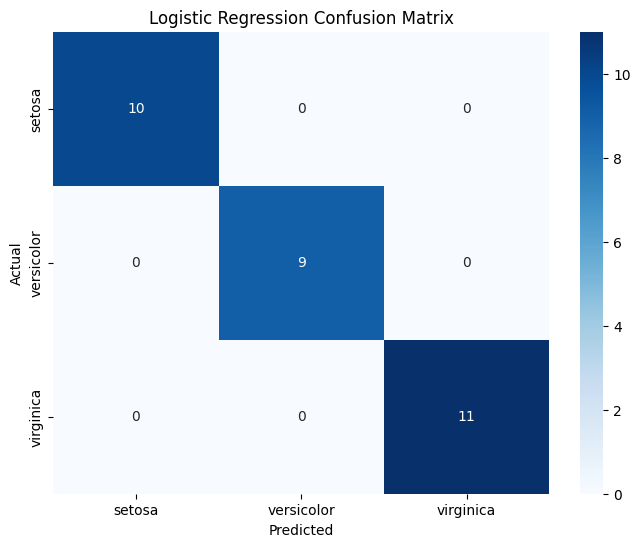

In [46]:
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
conf_matrix_dt = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('decision_tree_confusion_matrix.png')
plt.show()

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
y_pred_knn = knn_pipeline.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.savefig('knn_confusion_matrix.png')
plt.show()

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
y_pred_logreg = logreg_pipeline.predict(X_test)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()


### Visualize the Decision Tree:

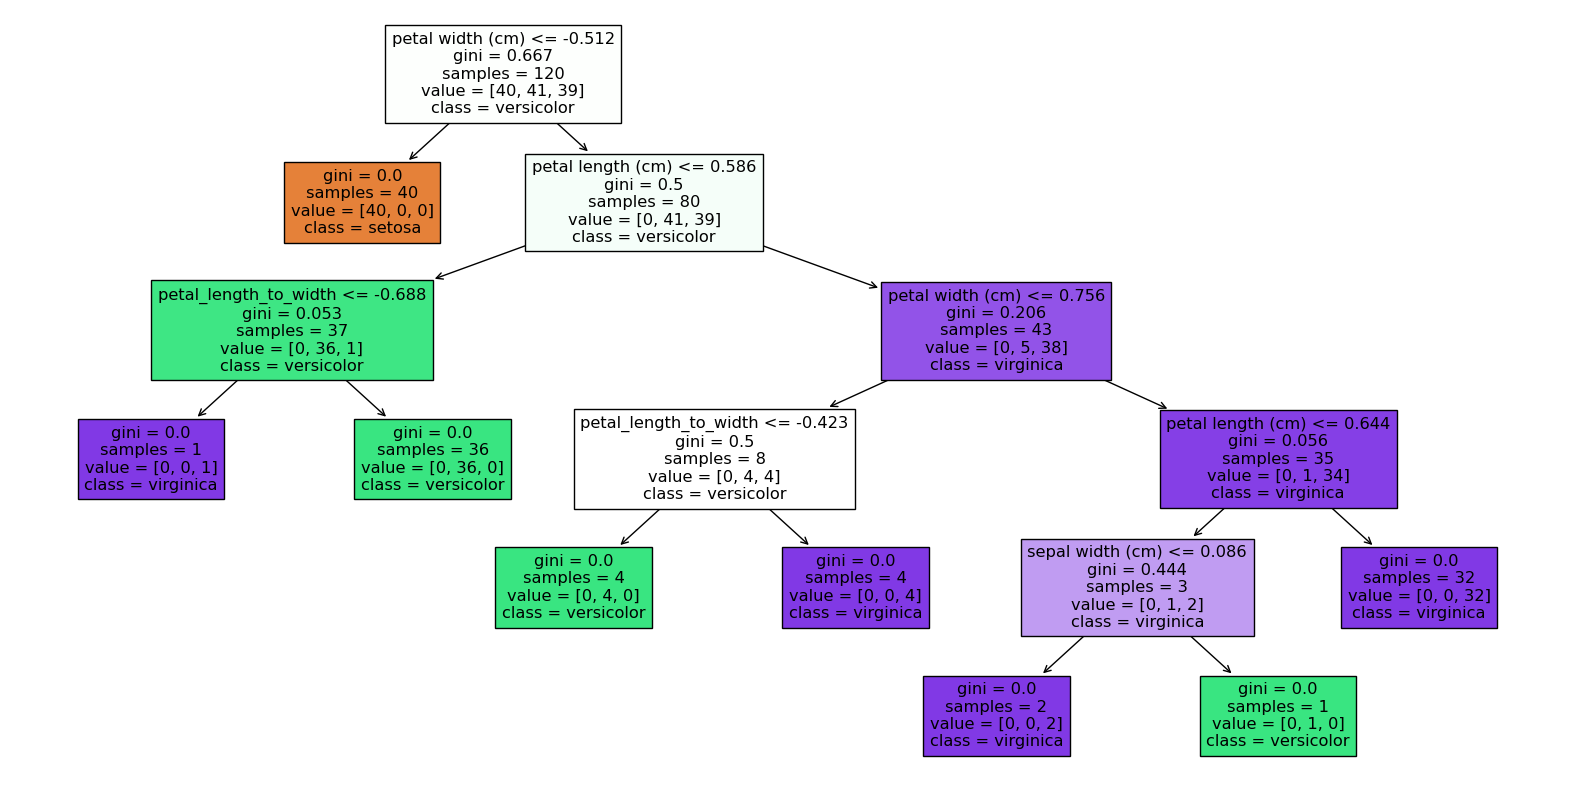

In [27]:
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['classifier'], feature_names=iris.feature_names + ['petal_length_to_width'], class_names=iris.target_names, filled=True)
plt.savefig('decision_tree.png')
plt.show()

### Saving and Loading the model:

In [29]:
joblib.dump(best_model, 'decision_tree_model.joblib')

loaded_model = joblib.load('decision_tree_model.joblib')

### Overall Results and Conclusion

- The decision tree model effectively classified iris species with an accuracy score of `0.9667`. Cross-validation scores further validated the model's robustness with a mean cross-validation score of `0.97`.

- The KNN and Logistic Regression models achieved perfect accuracy on the test set, but their cross-validation scores (KNN: `0.96`, Logistic Regression: `0.953`) indicate that they are slightly overfitting to the training data. The confusion matrices indicate that all models handle each class well.

Future improvements could include advanced feature engineering, more comprehensive cross-validation, and exploring other classification algorithms.